In [1]:
# Created: 2/19/2020
# Last Modified: 2/19/2020
# Pattern Recognition and Neural Networks
# Descriptive Statistics, Classification and Analysis 
# Using Python and Python Libraries
# Part 1

In [2]:
# Listing 1a

In [3]:
# Imports for libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import random

In [4]:
# Listing 1b

In [6]:
# Dataset
filename = "./Downloads/data_banknote_authentication.txt"
names = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
dataSetCsv = pd.read_csv(filename,',',error_bad_lines=False, names=names)
dataset = pd.DataFrame(dataSetCsv)
# dataset = read_csv(filename, names=names, delimiter='\t')

In [7]:
# Listing 2a
# Descriptive statistics
print(dataset.shape)

(1372, 5)


In [8]:
# Listing 2b
print(dataset.head(20))

    variance  skewness  curtosis  entropy  class
0    3.62160    8.6661  -2.80730 -0.44699      0
1    4.54590    8.1674  -2.45860 -1.46210      0
2    3.86600   -2.6383   1.92420  0.10645      0
3    3.45660    9.5228  -4.01120 -3.59440      0
4    0.32924   -4.4552   4.57180 -0.98880      0
5    4.36840    9.6718  -3.96060 -3.16250      0
6    3.59120    3.0129   0.72888  0.56421      0
7    2.09220   -6.8100   8.46360 -0.60216      0
8    3.20320    5.7588  -0.75345 -0.61251      0
9    1.53560    9.1772  -2.27180 -0.73535      0
10   1.22470    8.7779  -2.21350 -0.80647      0
11   3.98990   -2.7066   2.39460  0.86291      0
12   1.89930    7.6625   0.15394 -3.11080      0
13  -1.57680   10.8430   2.54620 -2.93620      0
14   3.40400    8.7261  -2.99150 -0.57242      0
15   4.67650   -3.3895   3.48960  1.47710      0
16   2.67190    3.0646   0.37158  0.58619      0
17   0.80355    2.8473   4.34390  0.60170      0
18   1.44790   -4.8794   8.34280 -2.10860      0
19   5.24230   11.02

In [9]:
# Listing 2c
print(dataset.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [10]:
# Listing 2d
print(dataset.groupby('class').size())

class
0    762
1    610
dtype: int64


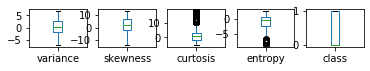

In [11]:
# Listing 3a
# Box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
pyplot.show()

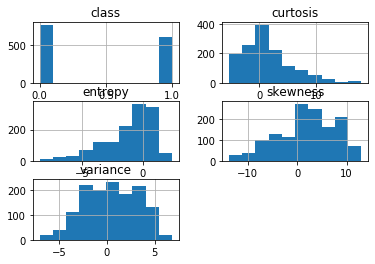

In [12]:
# Listing 3b
# Histograms
dataset.hist()
pyplot.show()

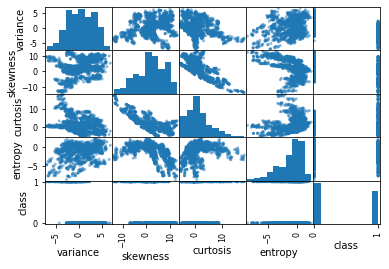

In [13]:
# Listing 3c
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [14]:
# Listing 4a
# Split-out validation dataset
array = dataset.values
random.shuffle(array)
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [15]:
# Listing 4b

In [16]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [17]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.992702 (0.006832
LDA: 0.968090 (0.010993


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.999091 (0.002727
CART: 0.984495 (0.012947
NB: 0.916113 (0.022361


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 1.000000 (0.000000


AttributeError: 'AxesSubplot' object has no attribute 'set_ticklabels'

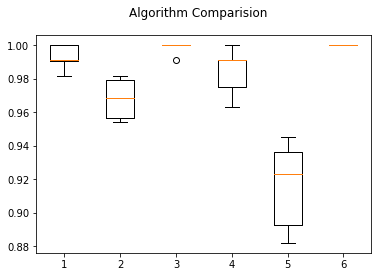

In [18]:
# Listing 4c
# Compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_ticklabels(names)
pyplot.show()

In [19]:
# Listing 5
# Make predictions on validation dataset
for name, model in models:
    print("------------------------------------------------")
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print("------------------------------------------------")

------------------------------------------------
0.9963636363636363
[[249   0]
 [  1  25]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       249
         1.0       1.00      0.96      0.98        26

    accuracy                           1.00       275
   macro avg       1.00      0.98      0.99       275
weighted avg       1.00      1.00      1.00       275

------------------------------------------------
------------------------------------------------
0.9781818181818182
[[243   6]
 [  0  26]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       249
         1.0       0.81      1.00      0.90        26

    accuracy                           0.98       275
   macro avg       0.91      0.99      0.94       275
weighted avg       0.98      0.98      0.98       275

------------------------------------------------
------------------------------------------------
1.0
[[249   0]
 [